## Black-hole binary formation channels with gaussian mixtures.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 


In [1]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize']=(7,5) 
plt.rcParams['font.size']=16 
plt.rcParams['font.family']='Liberation Serif' 
plt.rcParams['figure.autolayout']=True 
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
data = np.load('/home/irene/Desktop/Astrostatistics/astrostatistics_bicocca_2022-main/solutions/formationchannels.npy')

Text(0, 0.5, 'p(M)')

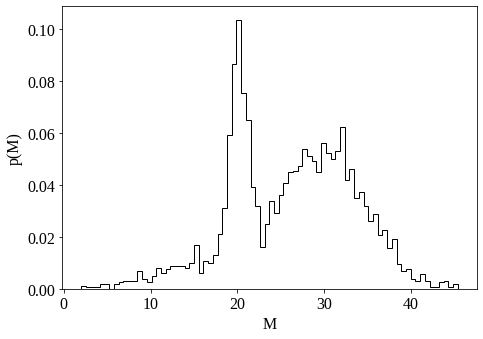

In [3]:
hist = plt.hist(data, bins=80, density=True, histtype='step', color='black', label='Data')
plt.xlabel(r'M')
plt.ylabel(r'p(M)')

In [4]:
#list of Gaussian mixture fits with a number of components from 1 to 10
gm = []
for n in tqdm(range(10)):
    gm.append(GaussianMixture(n_components=n+1, n_init=10).fit(data))

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


Text(0, 0.5, 'AIC')

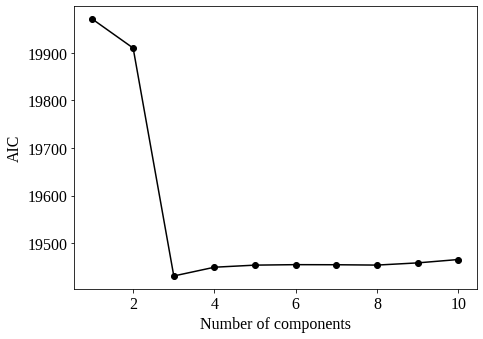

In [5]:
#compute AIC for each gaussian mixture fit
AIC = np.array([gm[n].aic(data) for n in range(10)])

#draw
plt.errorbar(np.linspace(1, 10, 10), AIC, c='black', fmt='-o')
plt.xlabel('Number of components')
plt.ylabel('AIC')

In [6]:
best = np.argmin(AIC)
print('Number of components of the best fit =', best+1)

Number of components of the best fit = 3


Text(0, 0.5, 'p(M)')

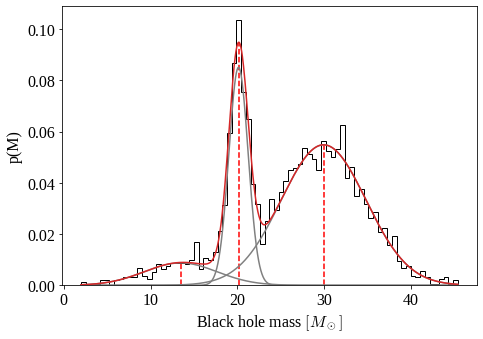

In [8]:
hist = plt.hist(data, bins=80, density=True, histtype='step', color='black', label='Data')

#single components
x = np.linspace(np.min(data), np.max(data), 1000)
weights = gm[best].predict_proba(x.reshape(-1, 1))
pdf = np.exp(gm[best].score_samples(x.reshape(-1, 1)))
pdf_individual = weights * pdf[:, np.newaxis]

for i in range(best+1):
    plt.plot(x, pdf_individual[:,i], c='gray')

#evaluate and plot the best fit
tot = np.exp(gm[best].score_samples(x.reshape(-1, 1)))
plt.plot(x, tot, label = 'Global fit', c = 'tab:red')

#draw the means
for n in range(best+1): 
    i = np.argmin(abs(x - gm[best].means_[n]))
    plt.vlines(gm[best].means_[n], ymin = 0, ymax = tot[i], linestyle = '--', color='red')

plt.xlabel("Black hole mass $[M_\odot]$")
plt.ylabel(r'p(M)')